In [38]:
import pandas as pd
import numpy as np


df = pd.read_csv("Sunspots.csv" )
df['Date'] = pd.to_datetime(df['Date'])
df.drop(columns = 'Unnamed: 0',inplace=True)
df.drop(index=df[df["Monthly Mean Total Sunspot Number"] == 0].index,inplace=True)
df = df.rename(columns={'Monthly Mean Total Sunspot Number': 'SunspotNumber'})
df['Date'] = pd.to_datetime(df['Date'])  
df['Year'] = df['Date'].dt.year
df.set_index('Date',inplace=True)
df=df.drop(df[(df.index.year > 1790) & (df.index.year < 1830)].index)
year = df.index.year
month = df.index.month





,SunspotNumber,Year,Moving Average_11year
Date,,,
2020-04-30,5.2,2020,49.542424
2020-05-31,0.2,2020,49.534848
2020-06-30,5.8,2020,49.556818
2020-07-31,6.1,2020,49.555303
2020-08-31,7.5,2020,49.570455
2020-09-30,0.6,2020,49.521212
2020-10-31,14.4,2020,49.571970
2020-11-30,34.0,2020,49.777273
2020-12-31,21.8,2020,49.818939


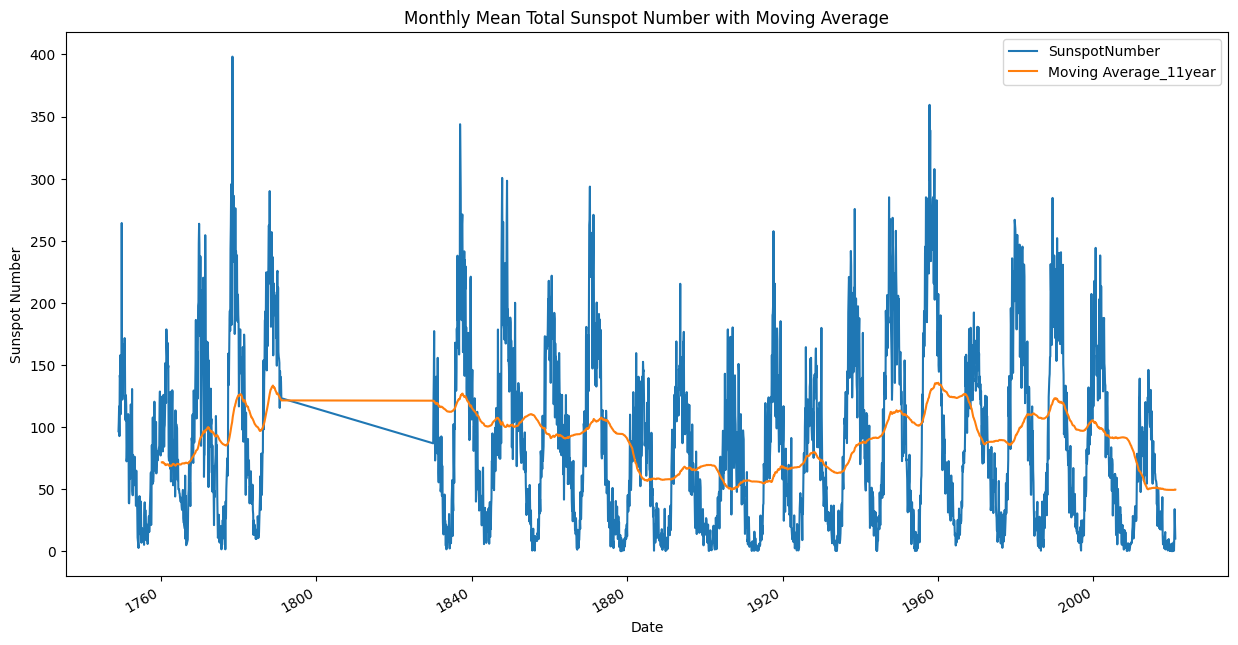

In [39]:
df["Moving Average_11year"] = df["SunspotNumber"].rolling(132).mean()
df.plot.line( y=["SunspotNumber", "Moving Average_11year"], figsize=(15, 8), title="Monthly Mean Total Sunspot Number with Moving Average", ylabel="Sunspot Number")
df.tail(10)

In [40]:
df.shift(periods=132,freq="MS")
df.tail(100)

,SunspotNumber,Year,Moving Average_11year
Date,,,
2012-10-31,76.5,2012,58.777273
2012-11-30,87.6,2012,57.970455
2012-12-31,56.8,2012,57.062879
2013-01-31,96.1,2013,56.174242
2013-02-28,60.9,2013,55.237121
...,...,...,...
2020-09-30,0.6,2020,49.521212
2020-10-31,14.4,2020,49.571970
2020-11-30,34.0,2020,49.777273


In [41]:
df["Shift_11year"]=df["SunspotNumber"].shift(periods=132)
df.tail(10)

,SunspotNumber,Year,Moving Average_11year,Shift_11year
Date,,,,
2020-04-30,5.2,2020,49.542424,0.6
2020-05-31,0.2,2020,49.534848,1.2
2020-06-30,5.8,2020,49.556818,2.9
2020-07-31,6.1,2020,49.555303,6.3
2020-08-31,7.5,2020,49.570455,5.5
2020-09-30,0.6,2020,49.521212,7.1
2020-10-31,14.4,2020,49.571970,7.7
2020-11-30,34.0,2020,49.777273,6.9
2020-12-31,21.8,2020,49.818939,16.3


In [42]:
df['Diff_11years'] = df['SunspotNumber'].diff(periods=132)
df.tail(10) 

,SunspotNumber,Year,Moving Average_11year,Shift_11year,Diff_11years
Date,,,,,
2020-04-30,5.2,2020,49.542424,0.6,4.6
2020-05-31,0.2,2020,49.534848,1.2,-1.0
2020-06-30,5.8,2020,49.556818,2.9,2.9
2020-07-31,6.1,2020,49.555303,6.3,-0.2
2020-08-31,7.5,2020,49.570455,5.5,2.0
2020-09-30,0.6,2020,49.521212,7.1,-6.5
2020-10-31,14.4,2020,49.571970,7.7,6.7
2020-11-30,34.0,2020,49.777273,6.9,27.1
2020-12-31,21.8,2020,49.818939,16.3,5.5


In [43]:
df['abc']=df['Shift_11year']-df['Diff_11years']
df=df.dropna()
df.head(10)

,SunspotNumber,Year,Moving Average_11year,Shift_11year,Diff_11years,abc
Date,,,,,,
1760-04-30,97.2,1760,71.703788,96.7,0.5,96.2
1760-05-31,120.0,1760,71.822727,104.3,15.7,88.6
1760-06-30,80.5,1760,71.548485,116.7,-36.2,152.9
1760-07-31,110.0,1760,71.678788,92.8,17.2,75.6
1760-08-31,126.0,1760,71.559848,141.7,-15.7,157.4
1760-09-30,102.2,1760,71.279545,139.2,-37.0,176.2
1760-10-31,84.3,1760,70.721212,158.0,-73.7,231.7
1760-11-30,99.5,1760,70.637879,110.5,-11.0,121.5
1760-12-31,101.7,1760,70.450000,126.5,-24.8,151.3


<Axes: title={'center': 'Monthly Mean Total Sunspot Number with Moving Average'}, xlabel='Date', ylabel='Sunspot Number'>

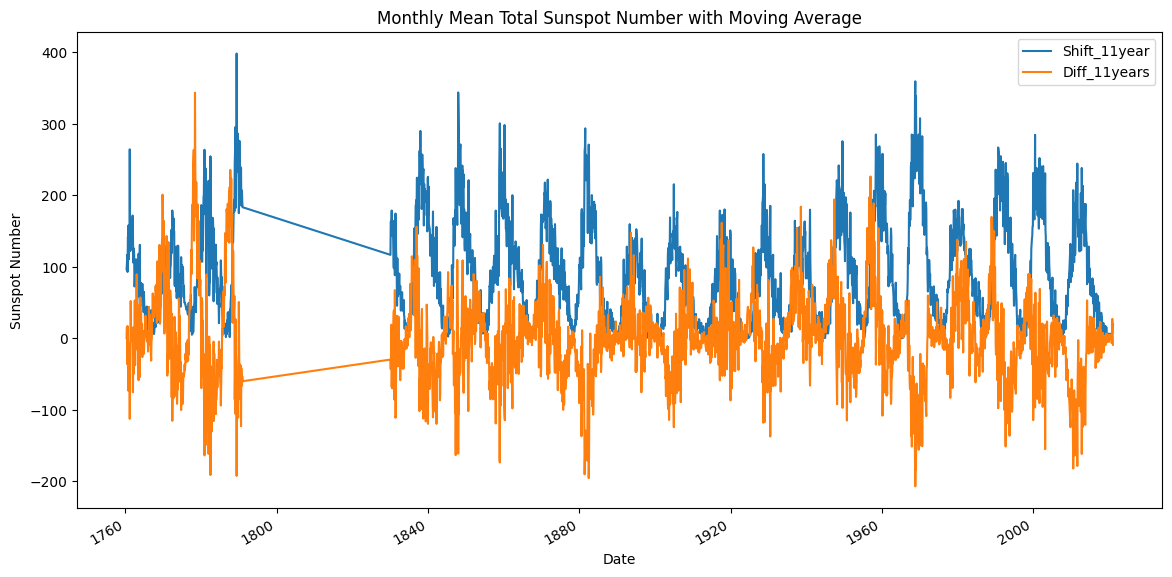

In [44]:
df.plot.line( y=["Shift_11year", "Diff_11years"], figsize=(14, 7), title="Monthly Mean Total Sunspot Number with Moving Average", ylabel="Sunspot Number")

In [45]:

start_year = df['Year'].min()
df['Cycle'] = ((df['Year'] - start_year) // 11) + 1
df['Cycle_Label'] = df['Cycle'].apply(
    lambda x: f"{start_year + (x - 1) * 11}-{start_year + x * 11 - 1}"
)
cycle_means= df.groupby('Cycle_Label')['SunspotNumber'].mean().reset_index()
print(cycle_means)  

   Cycle_Label  SunspotNumber
0    1760-1770      96.345736
1    1771-1781     116.943511
2    1782-1792     120.241667
3    1826-1836      82.460714
4    1837-1847     102.790909
5    1848-1858      94.542308
6    1859-1869      98.993893
7    1870-1880      83.930000
8    1881-1891      58.665152
9    1892-1902      66.288281
10   1903-1913      56.982946
11   1914-1924      70.104545
12   1925-1935      66.425758
13   1936-1946     104.523485
14   1947-1957     128.274242
15   1958-1968     109.208333
16   1969-1979      93.128788
17   1980-1990     120.587879
18   1991-2001      99.260606
19   2002-2012      55.869466
20   2013-2023      44.390722


In [46]:
import pandas as pd

# Veriyi oku
df = pd.read_csv("Sunspots.csv")

# Tarih kolonunu datetime formatına çevir
df['Date'] = pd.to_datetime(df['Date'])
df.drop(columns = 'Unnamed: 0',inplace=True)
df.drop(index=df[df["Monthly Mean Total Sunspot Number"] == 0].index,inplace=True)
# Yıl bilgisini çıkar
df['Year'] = df['Date'].dt.year

# 1790-1830 yıllarını çıkar
df = df[~df['Year'].between(1790, 1830)]

# İndeksleri sıfırla
df = df.reset_index(drop=True)

# Sonuçları kontrol et
print(df.head())
print(df.tail())

        Date  Monthly Mean Total Sunspot Number  Year
0 1749-01-31                               96.7  1749
1 1749-02-28                              104.3  1749
2 1749-03-31                              116.7  1749
3 1749-04-30                               92.8  1749
4 1749-05-31                              141.7  1749
           Date  Monthly Mean Total Sunspot Number  Year
2751 2020-09-30                                0.6  2020
2752 2020-10-31                               14.4  2020
2753 2020-11-30                               34.0  2020
2754 2020-12-31                               21.8  2020
2755 2021-01-31                               10.4  2021
